# Preprocess artista

## Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc

warnings.filterwarnings("ignore")

## Load the dataset

In [3]:
# Load the dataset.
dpi2_rep1 = sc.read_h5ad(
    "/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghuizing/data/artista/2DPI_1.h5ad"
)
dpi2_rep1.obsm["spatial"] = dpi2_rep1.obsm["spatial"] * np.array([-1, -1])
dpi2_rep1.X = dpi2_rep1.layers["counts"].copy()
print("loaded DPI2")

dpi5_rep1 = sc.read_h5ad(
    "/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghuizing/data/artista/5DPI_1.h5ad"
)
dpi5_rep1.obsm["spatial"] = dpi5_rep1.obsm["spatial"] * np.array([-1, -1])
dpi5_rep1.X = dpi5_rep1.layers["counts"].copy()
print("loaded DPI5")

dpi10_rep1 = sc.read_h5ad(
    "/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghuizing/data/artista/10DPI_1.h5ad"
)
dpi10_rep1.obsm["spatial"] = dpi10_rep1.obsm["spatial"] * np.array([-1, -1])
dpi10_rep1.X = dpi10_rep1.layers["counts"].copy()
dpi10_rep1 = dpi10_rep1[
    np.arange(dpi10_rep1.n_obs) != np.argmin(dpi10_rep1.obsm["spatial"][:, 0])
]
dpi10_rep1 = dpi10_rep1[
    np.arange(dpi10_rep1.n_obs) != np.argmin(dpi10_rep1.obsm["spatial"][:, 0])
]
dpi10_rep1 = dpi10_rep1[
    np.arange(dpi10_rep1.n_obs) != np.argmin(dpi10_rep1.obsm["spatial"][:, 0])
]
dpi10_rep1 = dpi10_rep1[
    np.arange(dpi10_rep1.n_obs) != np.argmin(dpi10_rep1.obsm["spatial"][:, 0])
]
print("loaded DPI10")

dpi10_rep2 = sc.read_h5ad(
    "/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghuizing/data/artista/10DPI_2.h5ad"
)
dpi10_rep2.obsm["spatial"] = dpi10_rep2.obsm["spatial"] * np.array([-1, -1])
dpi10_rep2.X = dpi10_rep2.layers["counts"].copy()
print("loaded DPI10")

dpi15_rep1 = sc.read_h5ad(
    "/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghuizing/data/artista/15DPI_4.h5ad"
)
dpi15_rep1.obsm["spatial"] = dpi15_rep1.obsm["spatial"] * np.array([-1, -1])
dpi15_rep1.X = dpi15_rep1.layers["counts"].copy()
print("loaded DPI15")

dpi15_rep4 = sc.read_h5ad(
    "/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghuizing/data/artista/15DPI_3.h5ad"
)
dpi15_rep4.obsm["spatial"] = dpi15_rep4.obsm["spatial"] * np.array([-1, -1])
dpi15_rep4 = dpi15_rep4[
    np.arange(dpi15_rep4.n_obs) != np.argmax(dpi15_rep4.obsm["spatial"][:, 1])
]
dpi15_rep4.X = dpi15_rep4.layers["counts"].copy()
print("loaded DPI15")

dpi20_rep3 = sc.read_h5ad(
    "/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghuizing/data/artista/20DPI_3.h5ad"
)
dpi20_rep3.obsm["spatial"] = dpi20_rep3.obsm["spatial"] * np.array([-1, -1])
dpi20_rep3.X = dpi20_rep3.layers["counts"].copy()
print("loaded DPI20")

dpi20_rep2 = sc.read_h5ad(
    "/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghuizing/data/artista/20DPI_2.h5ad"
)
dpi20_rep2.obsm["spatial"] = dpi20_rep2.obsm["spatial"] * np.array([-1, -1])
dpi20_rep2.X = dpi20_rep2.layers["counts"].copy()
dpi20_rep2 = dpi20_rep2[
    np.arange(dpi20_rep2.n_obs) != np.argmin(dpi20_rep2.obsm["spatial"][:, 0])
]
dpi20_rep2 = dpi20_rep2[
    np.arange(dpi20_rep2.n_obs) != np.argmin(dpi20_rep2.obsm["spatial"][:, 0])
]
print("loaded DPI20")

dpi30 = sc.read_h5ad(
    "/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghuizing/data/artista/30DPI.h5ad"
)
dpi30.obsm["spatial"] = dpi30.obsm["spatial"] * np.array([-1, -1])
dpi30.X = dpi30.layers["counts"].copy()
print("loaded DPI30")


adata = sc.concat(
    (
        dpi2_rep1,
        dpi5_rep1,
        dpi10_rep1,
        dpi10_rep2,
        dpi15_rep1,
        dpi15_rep4,
        dpi20_rep3,
        dpi20_rep2,
        dpi30,
    )
)
adata.obs_names_make_unique()
del (
    dpi2_rep1,
    dpi5_rep1,
    dpi10_rep1,
    dpi10_rep2,
    dpi15_rep1,
    dpi15_rep4,
    dpi20_rep3,
    dpi20_rep2,
    dpi30,
)

loaded DPI2
loaded DPI5
loaded DPI10
loaded DPI10
loaded DPI15
loaded DPI15
loaded DPI20
loaded DPI20
loaded DPI30


In [4]:
# Keep only injured half-hemisphere
adata = adata[adata.obs["inj_uninj"] == "inj"]
adata = adata[adata.obs["D_V"] == "D"]

In [5]:
adata

View of AnnData object with n_obs × n_vars = 22104 × 17042
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'Annotation'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    layers: 'counts'

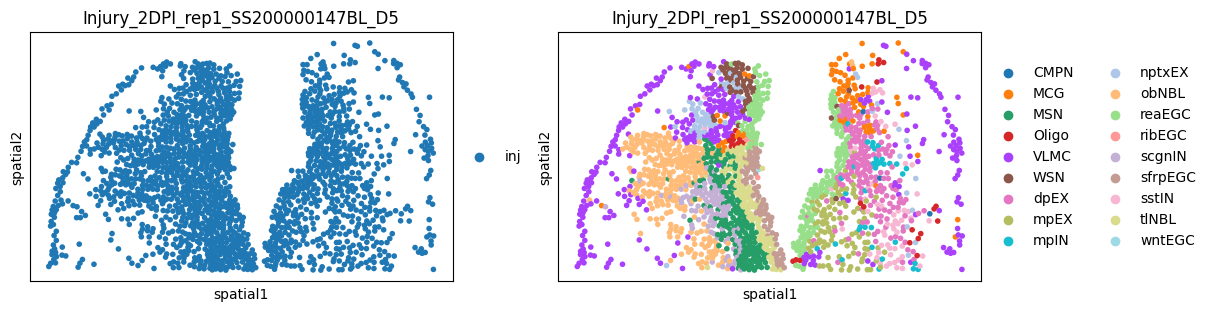

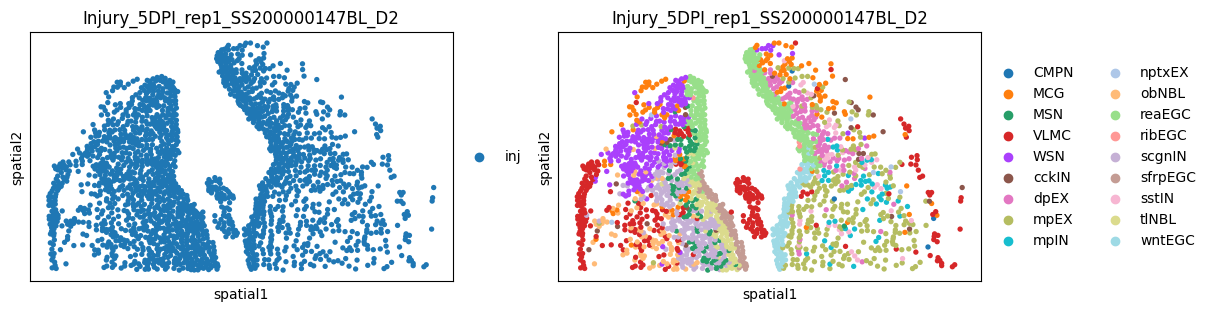

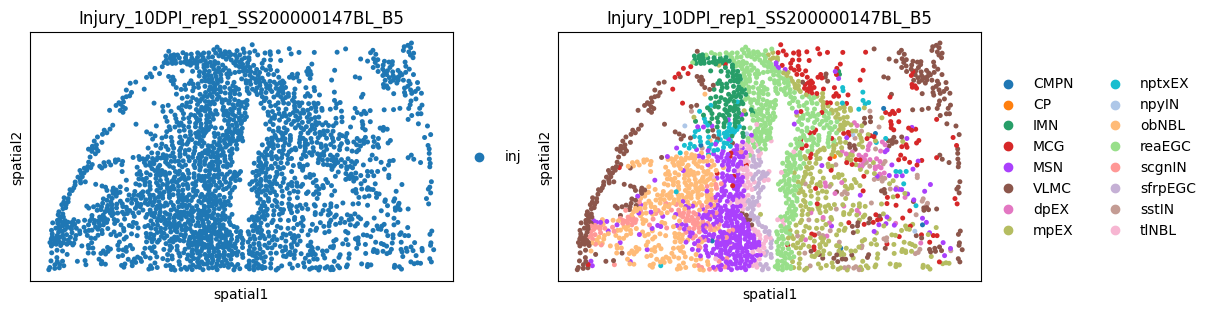

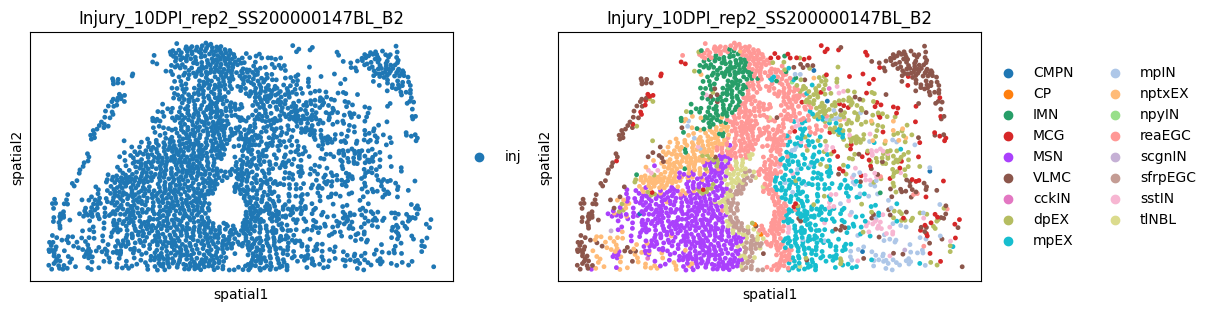

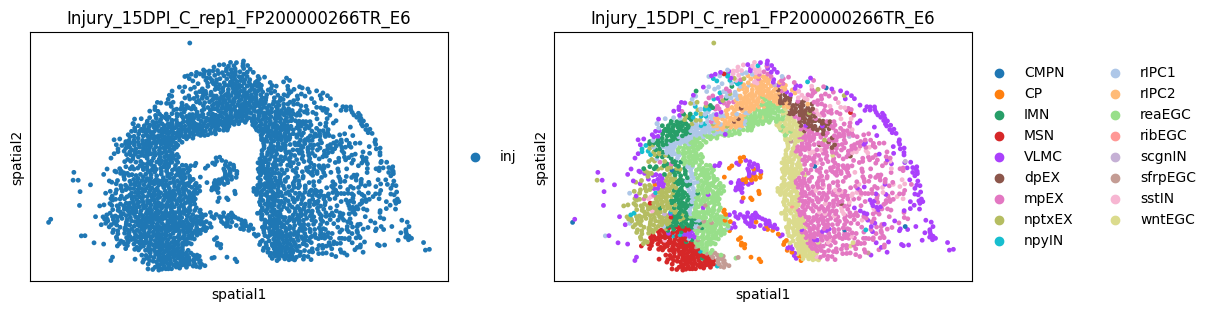

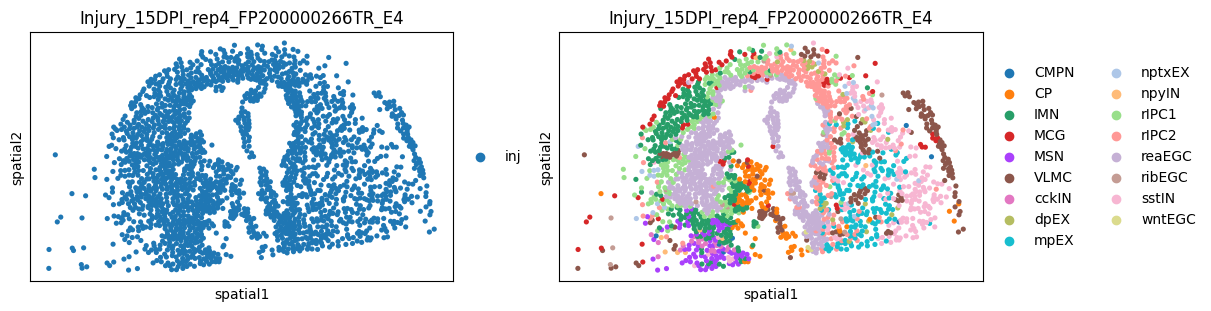

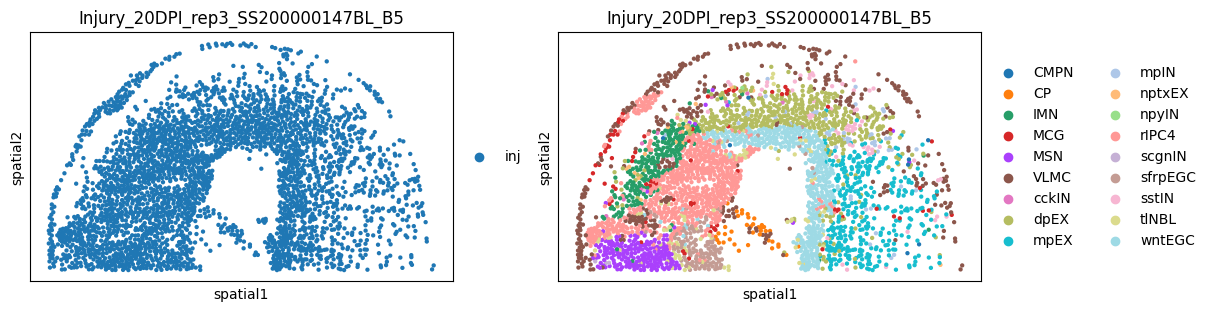

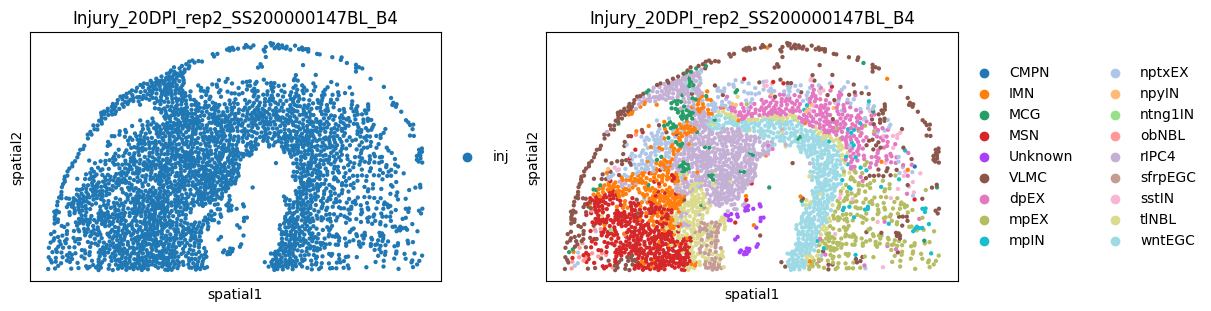

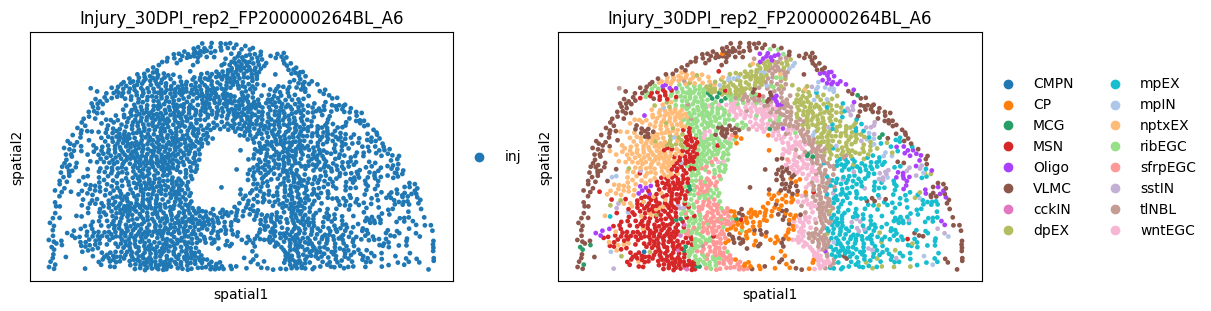

In [6]:
for b in adata.obs["Batch"].unique():
    idx = adata.obs["Batch"] == b
    fig, axes = plt.subplots(1, 2, figsize=(12, 3), constrained_layout=True)
    sc.pl.embedding(
        adata[idx], "spatial", color="inj_uninj", title=b, show=False, ax=axes[0]
    )
    sc.pl.embedding(
        adata[idx], "spatial", color="Annotation", title=b, show=False, ax=axes[1]
    )
    plt.show()

## Preprocess data

In [7]:
adata.obs["Batch"].unique()

array(['Injury_2DPI_rep1_SS200000147BL_D5',
       'Injury_5DPI_rep1_SS200000147BL_D2',
       'Injury_10DPI_rep1_SS200000147BL_B5',
       'Injury_10DPI_rep2_SS200000147BL_B2',
       'Injury_15DPI_C_rep1_FP200000266TR_E6',
       'Injury_15DPI_rep4_FP200000266TR_E4',
       'Injury_20DPI_rep3_SS200000147BL_B5',
       'Injury_20DPI_rep2_SS200000147BL_B4',
       'Injury_30DPI_rep2_FP200000264BL_A6'], dtype=object)

In [8]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [9]:
# Filter the counts.
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_cells(adata, max_genes=adata.obs["n_genes_by_counts"].quantile(0.999))
sc.pp.filter_genes(adata, min_cells=3)
print("Filtered counts")

Filtered counts


In [10]:
# Compute Pearson Residuals.
sc.experimental.pp.highly_variable_genes(
    adata,
    n_top_genes=10_000,
    batch_key="Batch",
    subset=True,
    chunksize=500,
)
sc.experimental.pp.normalize_pearson_residuals(adata)
print("Computed Pearson Residuals")

Computed Pearson Residuals


In [11]:
# Apply PCA.
sc.tl.pca(adata)
print("Computed PCA")

Computed PCA


In [12]:
# Integrate the batches.
sc.external.pp.harmony_integrate(adata, key="Batch", max_iter_harmony=20)
print("Integrated batches")

2024-04-02 22:21:22,571 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-02 22:21:28,104 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-02 22:21:28,228 - harmonypy - INFO - Iteration 1 of 20
2024-04-02 22:21:32,816 - harmonypy - INFO - Iteration 2 of 20
2024-04-02 22:21:37,436 - harmonypy - INFO - Iteration 3 of 20
2024-04-02 22:21:42,194 - harmonypy - INFO - Iteration 4 of 20
2024-04-02 22:21:46,843 - harmonypy - INFO - Iteration 5 of 20
2024-04-02 22:21:50,087 - harmonypy - INFO - Iteration 6 of 20
2024-04-02 22:21:54,141 - harmonypy - INFO - Iteration 7 of 20
2024-04-02 22:21:57,847 - harmonypy - INFO - Iteration 8 of 20
2024-04-02 22:22:01,292 - harmonypy - INFO - Iteration 9 of 20
2024-04-02 22:22:03,870 - harmonypy - INFO - Converged after 9 iterations


Integrated batches


In [13]:
# Compute the UMAP.
sc.pp.neighbors(adata, use_rep="X_pca_harmony")
print("Computed neighbors")
sc.tl.umap(adata)
print("Computed UMAP")

Computed neighbors
Computed UMAP


In [14]:
adata.obs["time"] = (
    adata.obs["Batch"].str.split("_").str[1].str.replace("DPI", "").astype(float)
)

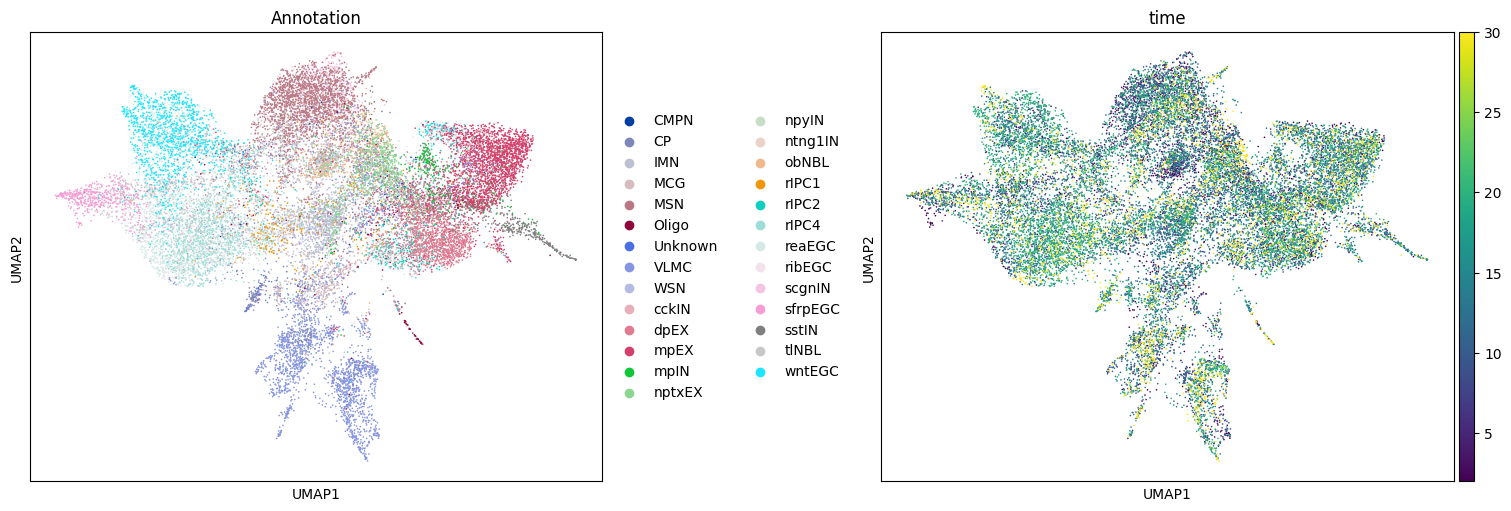

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
sc.pl.umap(adata, color="Annotation", show=False, ax=axes[0])
sc.pl.umap(adata, color="time", show=False, ax=axes[1], sort_order=False)
plt.savefig(
    "/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghuizing/data/artista/artista_processed.png"
)
plt.show()

In [16]:
# Save the data.
adata.write_h5ad(
    "/pasteur/zeus/projets/p02/ml4ig_hot/Users/ghuizing/data/artista/artista_processed.h5ad"
)
print("Saved data")

Saved data


In [17]:
adata

AnnData object with n_obs × n_vars = 22083 × 10000
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'Annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'time'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'hvg', 'pearson_residuals_normalization', 'pca', 'neighbors', 'umap', 'Annotation_colors'
    obsm: 'X_pca', 'X_spatial', 'spatial', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'